## Implementing SOM for identifying driving style of driver

[[0.715703   0.13161611 0.5104682  ... 0.68844247 0.44812406 0.52721551]
 [0.2446841  0.01531646 0.85661327 ... 0.4410766  0.75349498 0.71602764]
 [0.9500721  0.01545064 0.53035587 ... 0.68131065 0.60169573 0.03751901]
 ...
 [0.0655049  0.1374983  0.05301119 ... 0.83667476 0.08801736 0.0361988 ]
 [0.68826837 0.82153067 0.93538918 ... 0.5963488  0.71628567 0.76953318]
 [0.25455206 0.19187836 0.44371075 ... 0.4491925  0.21053258 0.46078333]]


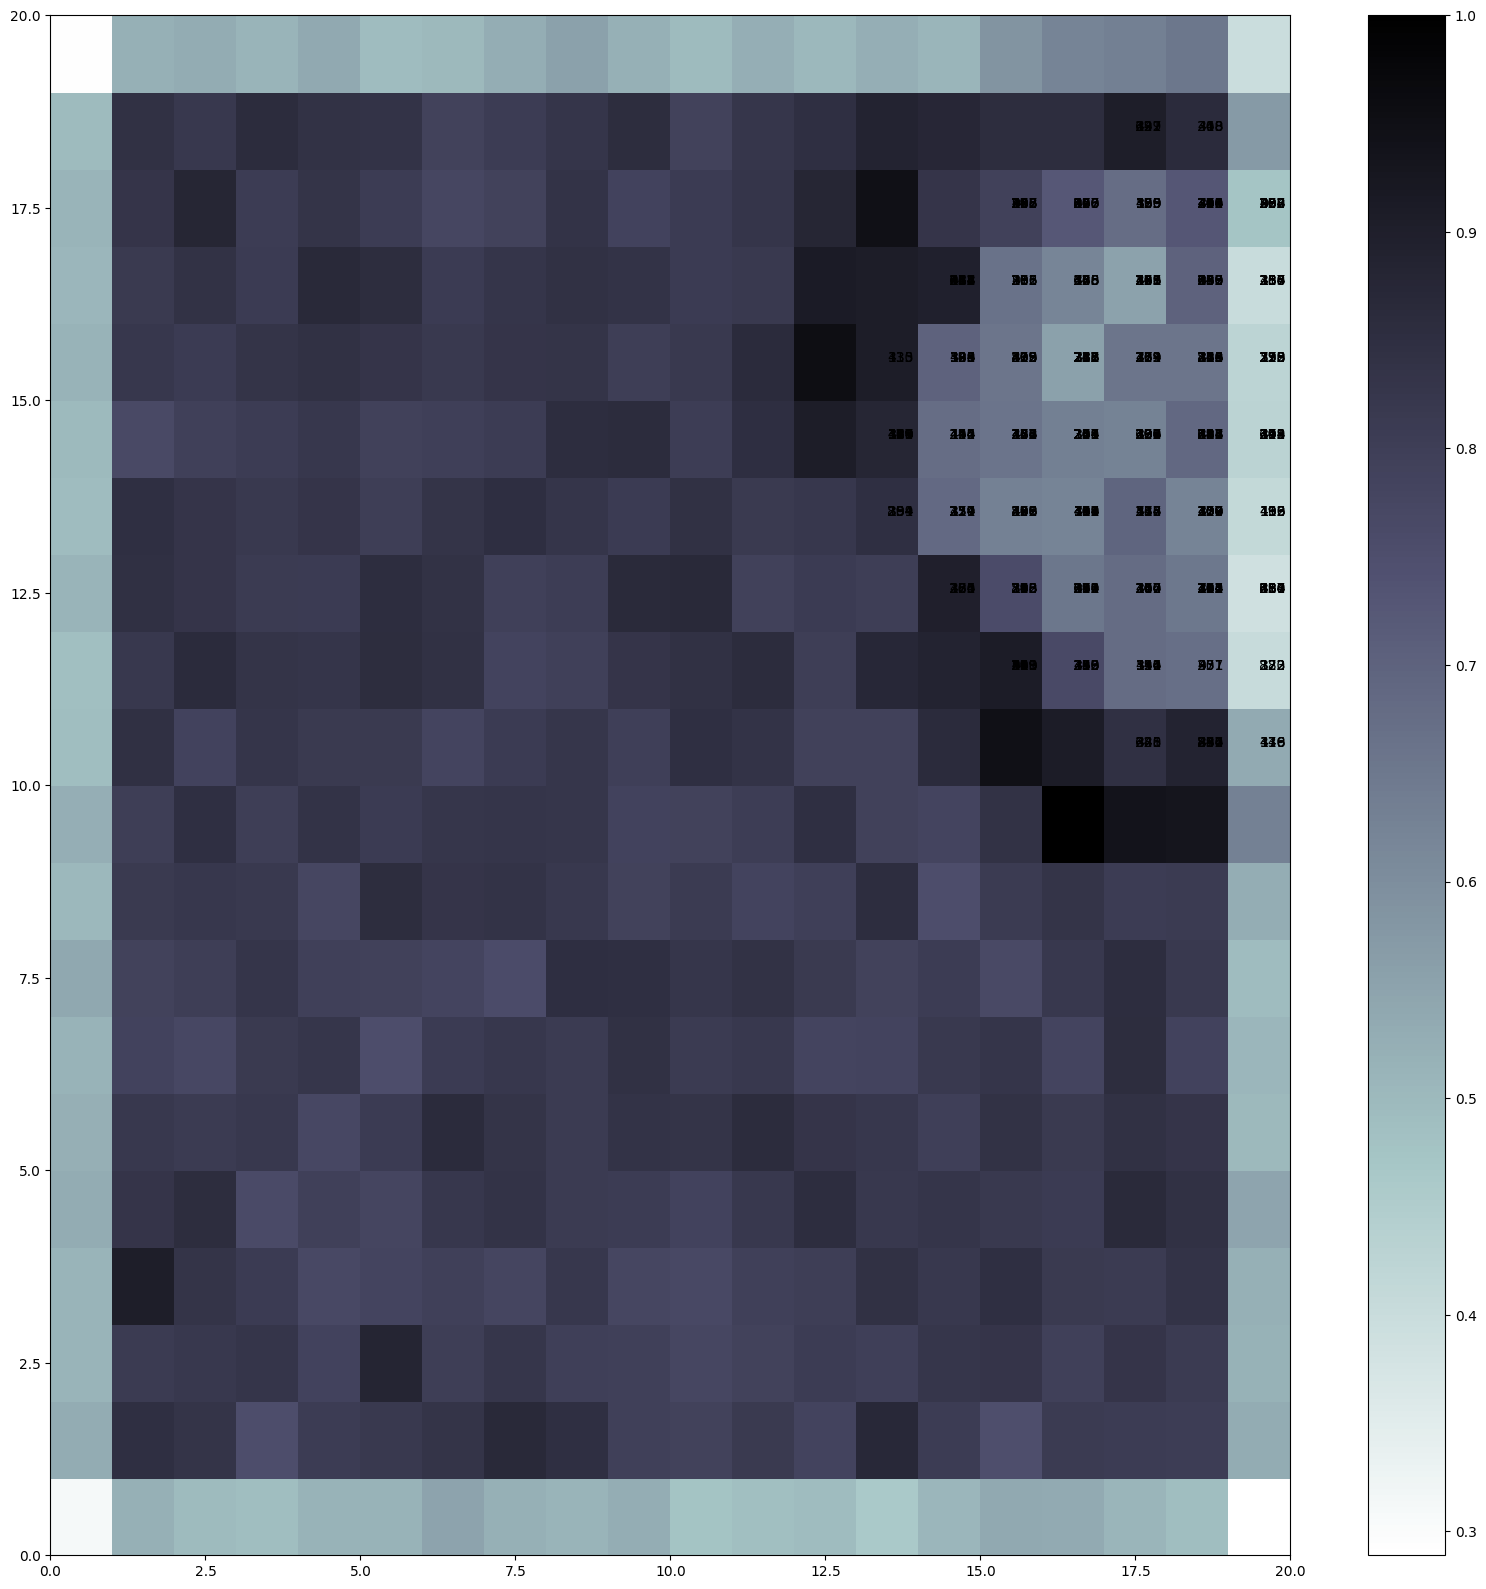

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

variables = {
    'Velocity': {'unit': 'm/s', 'preprocessing': 'sliding window', 'type': 'Vector of length 10'},
    'Accelerator Pedal Position': {'unit': '%', 'preprocessing': 'sliding window', 'type': 'Vector of length 10'},
    'Brake Pedal Position': {'unit': '%', 'preprocessing': 'sliding window', 'type': 'Vector of length 10'},
    'Fuel Consumed': {'unit': 'ml/s', 'preprocessing': 'Sum on sliding window', 'type': 'Scalar'},
    'Distance Travelled': {'unit': 'm', 'preprocessing': 'Sum on sliding window', 'type': 'Scalar'}
}
# Replace the dummy data with your actual data
velocity_data = np.random.rand(500, 10)  # Example data for velocity (Replace with actual data)
accelerator_data = np.random.rand(500, 10)  # Example data for accelerator pedal position
brake_data = np.random.rand(500, 10)  # Example data for brake pedal position
fuel_data = np.random.rand(500, 1)  # Example data for fuel consumed
distance_data = np.random.rand(500, 1)  # Example data for distance travelled

data = np.c_[velocity_data, accelerator_data, brake_data, fuel_data, distance_data]
data = data / data.max(axis=0)  # scaling data

print(data)
# Define the SOM parameters
map_dimensions = (20, 20)
num_iterations = 700
learning_rate = 0.5

# Initialize the SOM model
som = MiniSom(map_dimensions[0], map_dimensions[1], data.shape[1], sigma=1.0, learning_rate=learning_rate)

# Train the SOM on the data
som.train_random(data, num_iterations)

# Visualize the SOM
plt.figure(figsize=(map_dimensions[0], map_dimensions[1]))
for i, x in enumerate(data):
    winner = som.winner(x)
    plt.text(winner[0]+.5, winner[1]+.5, str(i), color='k')
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
plt.show()

In [2]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=9c243ce39131ffeb4ebcebea333176fd3ed9b04cf0e745bbe190c4d680c94f2b
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


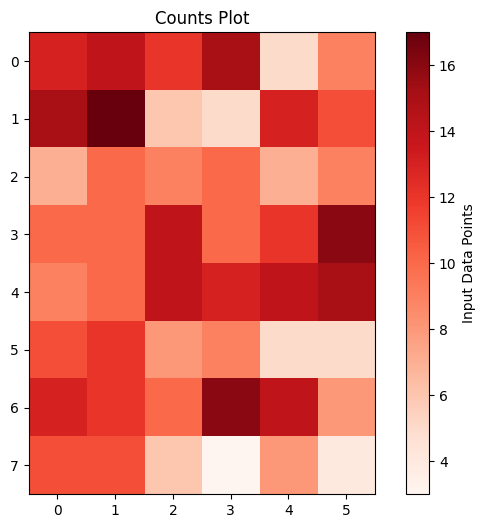

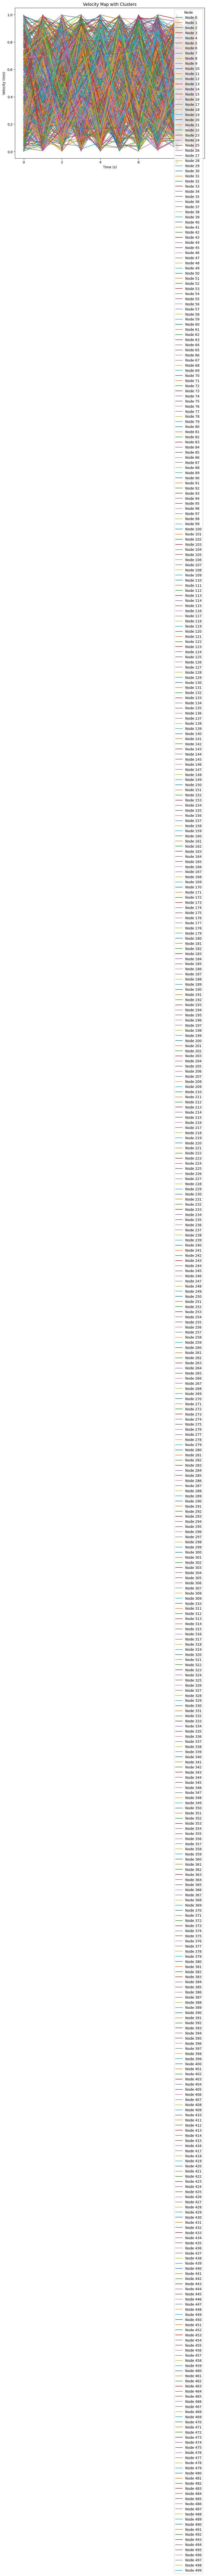

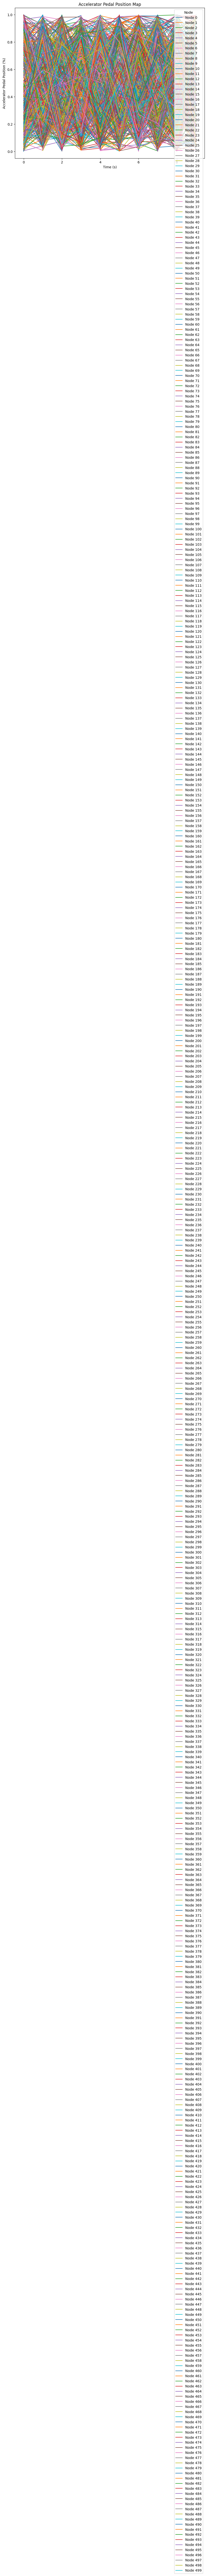

In [4]:
import matplotlib.pyplot as plt


# Fig 5: Counts Plot
plt.figure(figsize=(8, 6))
counts_data = som.win_map(data)
counts = np.array([len(v) for k, v in counts_data.items()])

# Reshape the counts array to maintain the same number of elements (48 nodes)
num_nodes = len(counts)
rows, cols = 8, 6  # Adjust these values as needed
counts_grid = counts.reshape(rows, cols)

plt.imshow(counts_grid, cmap='Reds', interpolation='nearest')
plt.colorbar(label='Input Data Points')
plt.title('Counts Plot')
plt.show()

# Fig 6: Velocity Map with Clusters
plt.figure(figsize=(10, 8))
for node, data in enumerate(velocity_data):
    plt.plot(data, label=f'Node {node}')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity Map with Clusters')
plt.legend(title='Node')
plt.show()

# Fig 7: Accelerator Pedal Position Map
plt.figure(figsize=(10, 8))
for node, data in enumerate(accelerator_data):
    plt.plot(data, label=f'Node {node}')
plt.xlabel('Time (s)')
plt.ylabel('Accelerator Pedal Position (%)')
plt.title('Accelerator Pedal Position Map')
plt.legend(title='Node')
plt.show()

# Fig 8: Brake Pedal Position Map
plt.figure(figsize=(10, 8))
for node, data in enumerate(brake_data):
    plt.plot(data, label=f'Node {node}')
plt.xlabel('Time (s)')
plt.ylabel('Brake Pedal Position (%)')
plt.title('Brake Pedal Position Map')
plt.legend(title='Node')
plt.show()

# Fig 9: Fuel and Distance Map
plt.figure(figsize=(8, 8))
for node, data in enumerate(fuel_data):
    plt.scatter(0, 0, s=data, label=f'Node {node}', alpha=0.5)  # Using scatter plot to represent sector size
plt.xlabel('Fuel Consumption (ml/s)')
plt.ylabel('Distance Covered (m)')
plt.title('Fuel and Distance Map')
plt.legend(title='Node')
plt.show()

## SOM for Breast Cancer Dataset

In [5]:
from minisom import MiniSom
from sklearn.datasets import load_breast_cancer
import time

In [6]:
som_grid_rows = 30
som_grid_columns = 20
iterations = 500
sigma = 1
learning_rate = 0.5 

In [7]:

# Load the breast cancer dataset
breast_cancer_data = load_breast_cancer()

# Access the data and target separately
data = breast_cancer_data.data
target = breast_cancer_data.target


In [8]:
som = MiniSom(x = som_grid_rows,
             y = som_grid_columns,
             input_len = data.shape[1],
             sigma = sigma,
             learning_rate = learning_rate)
som.random_weights_init(data)

In [9]:
start_time = time.time()
som.train_random(data,iterations)
elapsed_time = time.time()-start_time
print(elapsed_time, " seconds")

0.10925650596618652  seconds


In [10]:
from pylab import plot,axis,show,pcolor,colorbar,bone
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o','s','D']
colors = ['r','g','b']

for cnt,xx in enumerate(data):
    w = som.winner(xx)
    plot(w[0]+.5,w[1]+.5,markers[target[cnt]],markerfacecolor = 'None',
        markeredgecolor = colors[target[cnt]],markersize = 12, markeredgewidth = 2)
axis([0,som._weights.shape[0],0,som._weights.shape[1]])
show()

### red - malignant tumors,green - nonmalignant tumors


## CCA on breast cancer dataset

In [11]:
import numpy as np
from sklearn.datasets import load_diabetes
from minisom import MiniSom
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt

# Load the Pima Indians Diabetes dataset
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target

# Normalize the data
data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

# Define SOM parameters
map_size = (10, 10)  # Grid size
input_len = data.shape[1]  # Number of features

# Initialize SOM
som = MiniSom(map_size[0], map_size[1], input_len, sigma=0.3, learning_rate=0.5)

# Train the SOM
som.train_random(data, 1000)  # 1000 iterations

# Get SOM weights for the training data
som_weights = np.array([som.winner(x) for x in data])

# Flatten the SOM weights
flattened_weights = som_weights.reshape(-1, 2)

# Perform CCA
cca = CCA(n_components=1)  # Number of canonical components to find
cca.fit(flattened_weights, target)

# Get canonical variables
som_canonical, target_canonical = cca.transform(flattened_weights, target)

# Print canonical correlations
print("Canonical Correlations:", cca.x_rotations_)

# Map SOM
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Marking the winning neurons for each sample
for i, (x, t) in enumerate(zip(data, target)):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor=plt.cm.jet(t / 200.), markeredgecolor='None', markersize=10, alpha=0.5)  # mark the winner neurons

plt.title('Self-Organizing Map of Pima Indians Diabetes Dataset')
plt.show()


Canonical Correlations: [[0.87854523]
 [0.47765917]]


## implementation of kohonnen SOM for the CCA of iris_dataset

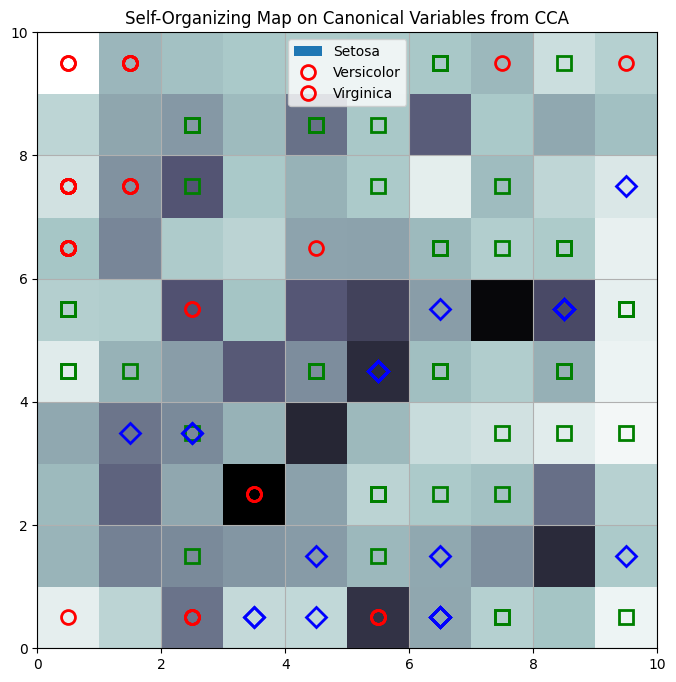

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
from minisom import MiniSom
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Perform Canonical Correlation Analysis (CCA)
cca = CCA(n_components=1)
cca.fit(X, y)
X_c, y_c = cca.transform(X, y)

# Train a Self-Organizing Map (SOM) on the canonical variables obtained from CCA
som = MiniSom(x=10, y=10, input_len=1, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_c)
som.train_random(data=X_c, num_iteration=100)

# Visualize the SOM clusters
plt.figure(figsize=(8, 8))
plt.title('Self-Organizing Map on Canonical Variables from CCA')
plt.pcolor(som.distance_map().T, cmap='bone_r')  # distance map as background
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']
for i, x in enumerate(X_c):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markerfacecolor='None',
             markeredgecolor=colors[y[i]], markersize=10, markeredgewidth=2)
plt.legend(['Setosa', 'Versicolor', 'Virginica'])
plt.grid()
plt.show()
